In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import List

def interpolate_two_vectors(
    v1: np.ndarray, 
    v2: np.ndarray, 
    alpha: List[float], 
    visualize: bool = False
) -> np.ndarray:
    
    dash = "--"
    black = "black"
    gray = "gray"
    red = "red"
    data_legend = "data"
    interpolated_legend = "interpolated"
    
    interpolations = []
    for a in alpha:
        interpolation = v1 * (1 - a) + v2 * a
        interpolations.append(interpolation)
    
    if visualize is True:           
        _, axes = plt.subplots(
            figsize=(len(alpha) * 5, 5), 
            nrows=1, 
            ncols=len(alpha),
            subplot_kw={"projection": "3d"} if v1.size == 3 else None
        )
        
        
        axes_iter = [axes]
        if len(alpha) > 1:
            axes_iter = axes.flatten()
    
        for a, interpolation, ax in zip(alpha, interpolations, axes_iter):
        
            if interpolation.size == 1:
                ax.plot([v1[0], v2[0]], [0, 0], gray, linestyle=dash)
                ax.scatter(x=[v1[0], v2[0]], y=[0, 0], color=black, label=data_legend)
                ax.scatter(x=[interpolation], y=[0], color=red, label=interpolated_legend)
                ax.legend(loc="upper left")
                ax.set_yticks([])
                
            elif interpolation.size == 2:
                ax.plot([v1[0], v2[0]], [v1[1], v2[1]], gray, linestyle=dash)
                ax.scatter(x=[v1[0], v2[0]], y=[v1[1], v2[1]], color=black, label=data_legend)
                ax.scatter(x=[interpolation[0]], y=[interpolation[1]], color=red, label=interpolated_legend)
                ax.legend(loc="upper left")
                ax.grid(True)
                
            elif interpolation.size == 3:
                ax.plot([v1[0], v2[0]], [v1[1], v2[1]], [v1[2], v2[2]], gray, linestyle=dash)
                ax.scatter(xs=[v1[0], v2[0]], ys=[v1[1], v2[1]], zs=[v1[2], v2[2]], color=black, label=data_legend)
                ax.scatter(xs=[v2[0]], ys=[v2[1]], zs=[v2[2]], color=black)  # FIXME
                ax.scatter(xs=[interpolation[0]], ys=[interpolation[1]], zs=[interpolation[2]], color=red, label=interpolated_legend)
                ax.set_proj_type("ortho")
                ax.legend(loc="upper left")
                
            else:
                return np.array(interpolations)
            
            ax.set_title(f"alpha = {a:.3f} \n")
                
        plt.show()
        
    return np.array(interpolations)

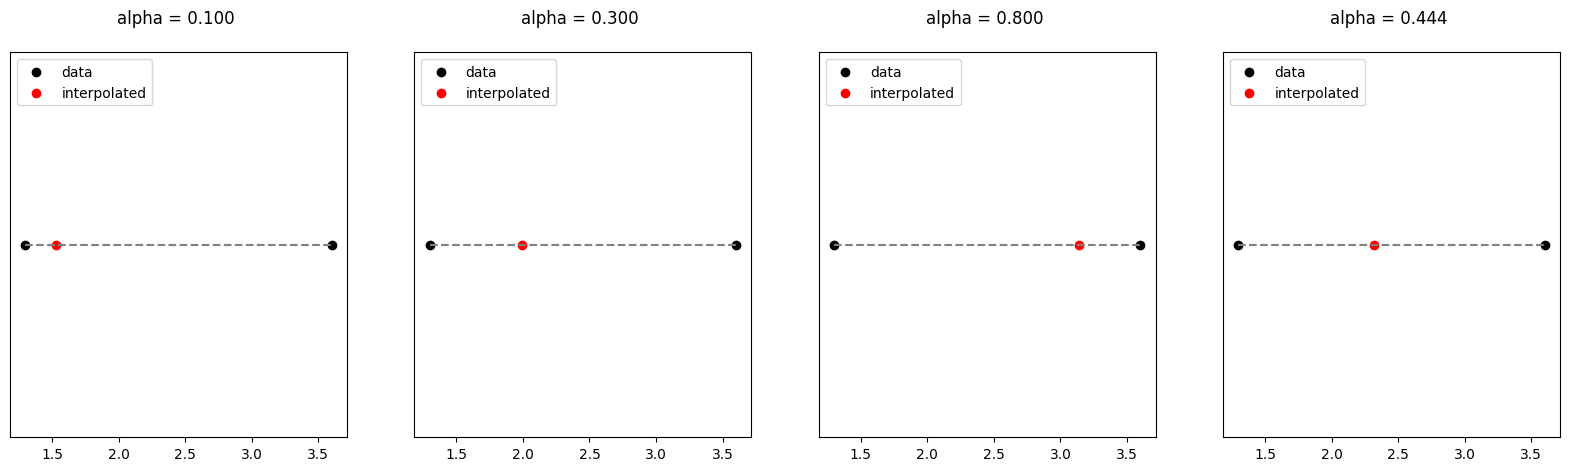

array([[1.53  ],
       [1.99  ],
       [3.14  ],
       [2.3212]])

In [2]:
# 1D

v1 = np.array([1.3])
v2 = np.array([3.6])
alpha = [0.1, 0.3, 0.8, 0.444]

interpolate_two_vectors(v1, v2, alpha, visualize=True)

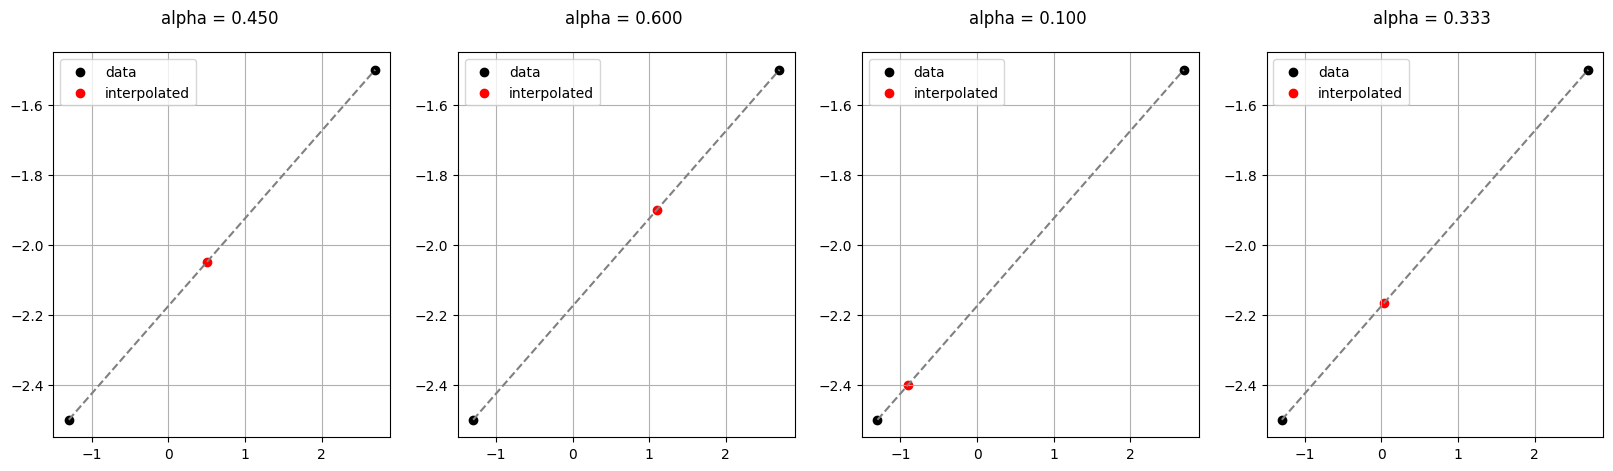

array([[ 0.5  , -2.05 ],
       [ 1.1  , -1.9  ],
       [-0.9  , -2.4  ],
       [ 0.032, -2.167]])

In [3]:
# 2D

v1 = np.array([-1.3, -2.5])
v2 = np.array([2.7, -1.5])
alpha = [0.45, 0.6, 0.1, 0.333]

interpolate_two_vectors(v1, v2, alpha, visualize=True)

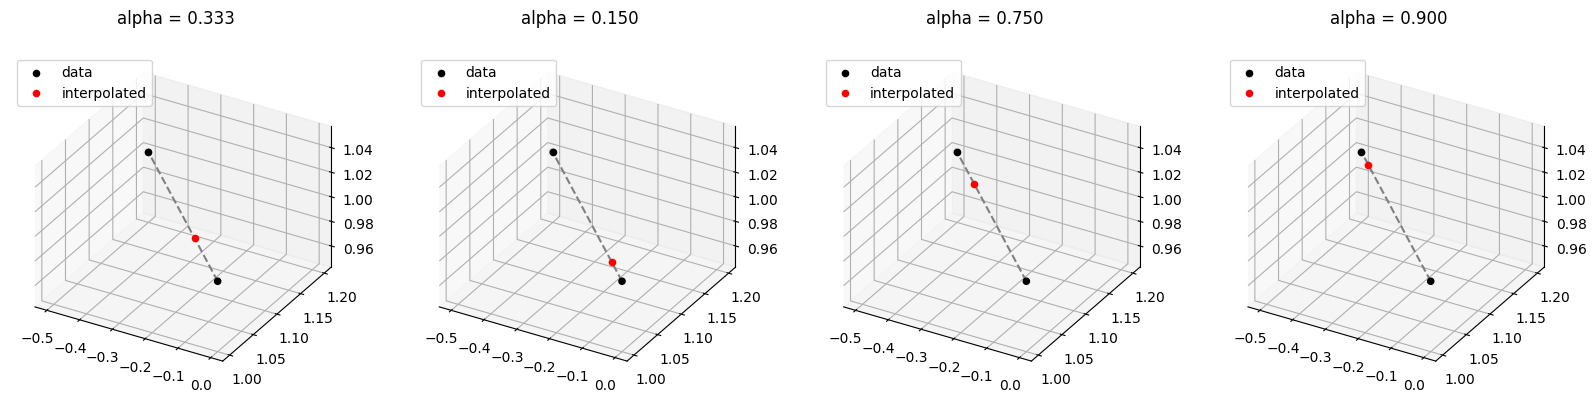

array([[-0.1665,  1.0666,  1.    ],
       [-0.075 ,  1.03  ,  1.    ],
       [-0.375 ,  1.15  ,  1.    ],
       [-0.45  ,  1.18  ,  1.    ]])

In [4]:
# 3D

v1 = np.array([0, 1, 1])
v2 = np.array([-0.5, 1.2, 1])
alpha = [0.333, 0.15, 0.75, 0.9]

interpolate_two_vectors(v1, v2, alpha, visualize=True)

In [5]:
# 4D or higher

import torch
import torch.nn as nn

# 32D
embeddings = nn.Embedding(2, 32)

v1 = embeddings(torch.tensor(0)).detach().numpy()
v2 = embeddings(torch.tensor(1)).detach().numpy()
alpha = [0.1, 0.5, 0.3, 0.2]

interpolate_two_vectors(v1, v2, alpha)

array([[ 7.62077093e-01,  1.29124343e+00, -6.84361160e-01,
        -6.09649599e-01, -7.65964389e-01, -3.06535691e-01,
         6.12711608e-01,  2.79399157e-01,  1.68153480e-01,
         9.98653054e-01, -1.31590456e-01, -1.05776930e+00,
         1.79577875e+00, -1.15841627e-03, -1.77378619e+00,
         9.12473500e-01,  4.86587971e-01, -2.81786114e-01,
         3.54215235e-01, -2.52348840e-01,  1.63696659e+00,
         2.16303170e-01, -1.52252555e-01,  2.66019274e-02,
         1.65617436e-01,  3.78290117e-01, -4.09932286e-01,
        -1.19273856e-01,  3.98346931e-01,  2.52125412e-03,
         7.34829307e-01, -2.54885375e-01],
       [ 8.97734404e-01,  9.41371381e-01, -4.57736671e-01,
        -1.02721095e+00, -5.21048546e-01, -3.03166986e-01,
         8.73824835e-01, -4.12713766e-01,  4.51726988e-02,
         7.84583569e-01,  9.73793343e-02, -9.31152463e-01,
         1.55066681e+00, -2.34261766e-01, -5.64054489e-01,
         6.25203848e-01, -8.09468925e-02,  1.10932827e-01,
         1.83